In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout


In [223]:
housing_data = pd.read_csv("california_housing_train.csv")

In [224]:
housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [225]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [226]:
housing_data.drop('ocean_proximity', axis=1, inplace=True)


In [227]:
housing_data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [228]:
tf.one_hot([18, 105, 150, 3200, 18530], depth=20000)

<tf.Tensor: shape=(5, 20000), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [229]:
pd.get_dummies(["red", "green", "blue", "orange", "blue", "red", "blue"]).astype("category")

,blue,green,orange,red
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
5,0,0,0,1
6,1,0,0,0


In [230]:
# num_columns = attributes_train.shape[1]
# num_outputs = 1

In [231]:
attributes = housing_data.drop(columns=["median_house_value"])
target = housing_data.median_house_value

In [232]:
attributes_train_val, attributes_test, target_train, target_test = train_test_split(
    attributes, target, test_size=5000)

In [233]:
attributes_train, attributes_val, target_train, target_val = train_test_split(
    attributes_train_val, target_train, test_size=2000)

In [234]:
len(attributes_train), len(attributes_val), len(attributes_test)

(13640, 2000, 5000)

In [235]:
num_columns = attributes_train.shape[1]
num_outputs = 1

DROPOUT_RATE = 0.5

In [236]:
0.3 * len(housing_data)

6192.0

In [237]:
attributes_train.shape

(13640, 8)

In [238]:
attributes_train.values

array([[-1.17860e+02,  3.41000e+01,  2.90000e+01, ...,  5.88000e+02,
         1.96000e+02,  5.08320e+00],
       [-1.16810e+02,  3.39000e+01,  1.70000e+01, ...,  8.20000e+02,
         3.81000e+02,  1.32860e+00],
       [-1.17810e+02,  3.38200e+01,  2.20000e+01, ...,  1.05700e+03,
         3.24000e+02,  1.08111e+01],
       ...,
       [-1.21960e+02,  3.73400e+01,  3.70000e+01, ...,  2.93000e+02,
         1.32000e+02,  3.78130e+00],
       [-1.24090e+02,  4.09200e+01,  1.20000e+01, ...,  1.15300e+03,
         4.62000e+02,  2.81820e+00],
       [-1.19340e+02,  3.63200e+01,  6.00000e+00, ...,  1.76900e+03,
         5.80000e+02,  3.15740e+00]])

In [239]:
scaler = MinMaxScaler()
attributes_train = scaler.fit_transform(attributes_train)
attributes_val = scaler.transform(attributes_val)
attributes_test = scaler.transform(attributes_test)

In [240]:
attributes_train.max(axis=0)

array([ 1.,  1.,  1.,  1., nan,  1.,  1.,  1.])

In [241]:
tf.keras.backend.clear_session()

In [242]:
model = Sequential([
    Input(num_columns),
    Dropout(DROPOUT_RATE),
    Dense(32, activation = "relu"),
    Dropout(DROPOUT_RATE),
    Dense(64, activation = "relu"),
    Dropout(DROPOUT_RATE),
    Dense(32, activation = "relu"),
    Dense(num_outputs, activation = None)
])

In [243]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 32)                288       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [244]:
model.weights[0].numpy().shape

(8, 32)

In [245]:
model.compile(loss="mse")

In [246]:
history = model.fit(attributes_train, target_train, epochs=10, validation_data=(attributes_val, target_val))

Epoch 1/10


427/427 [==============================] - 5s 11ms/step - loss: nan - val_loss: nan
Epoch 2/10
 91/427 [=====>........................] - ETA: 3s - loss: nan

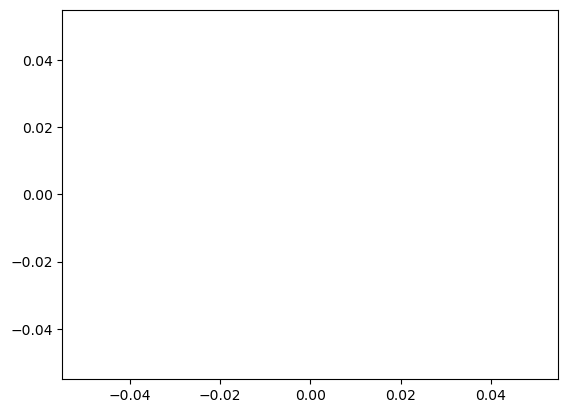

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# plt.semilogy()
plt.show()

In [ ]:
model.predict(attributes_train)

427/427 [==============================] - 1s 1ms/step


array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

(array([ 578., 2393., 2712., 2552., 1818., 1167.,  799.,  468.,  315.,
         838.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <BarContainer object of 10 artists>)

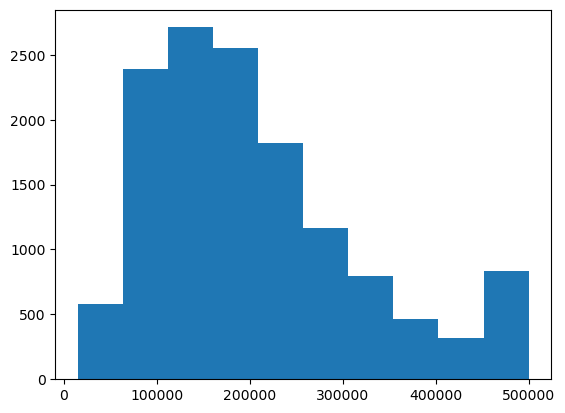

In [ ]:
plt.hist(target_train)

In [ ]:
model.evaluate(attributes_train, target_train)

427/427 [==============================] - 1s 2ms/step - loss: nan


nan

In [ ]:
model.evaluate(attributes_test, target_test)

157/157 [==============================] - 0s 2ms/step - loss: nan


nan